#decision tree

In [64]:
import pandas as pd
df = pd.read_csv('/content/Copy of Smoking Data.csv.xls - Copy of Smoking Data.csv.xls.csv')

In [65]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


#x y partition

In [66]:
x = df.drop('smoker',axis=1)

In [67]:
y = df['smoker']

#encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [70]:
from pandas.core.dtypes.common import is_numeric_dtype

In [71]:
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    
    x[column] = le.fit_transform(x[column])

In [72]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


#spliting

In [73]:
from sklearn.model_selection import train_test_split as tts

In [74]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1) 

In [75]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


In [76]:
ytrain.head()

744    no
363    no
10     no
970    no
634    no
Name: smoker, dtype: object

In [77]:
from sklearn.tree import DecisionTreeClassifier
d_clf = DecisionTreeClassifier()


#training

In [78]:
d_clf.fit(xtrain,ytrain) #fit manei training

DecisionTreeClassifier()

In [79]:
from sklearn import tree
import matplotlib.pyplot as plt

In [80]:
#tree.plot_tree(d_clf)

In [81]:
#plt.figure(figsize=(10,10))
#tree.plot_tree(d_clf)

#training tree

In [82]:
x_features = xtrain.columns

[Text(0.33679755287418656, 0.9791666666666666, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(0.2057983663232104, 0.9375, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(0.052060737527114966, 0.8958333333333334, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(0.04772234273318872, 0.8541666666666666, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.03036876355748373, 0.8125, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.013015184381778741, 0.7708333333333334, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.008676789587852495, 0.7291666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.01735357917570499, 0.7291666666666666, 'bmi <= 18.953\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.008676789587852495, 0.6875, 'age <= 34.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.004338394793926247, 0.6458333333333334, 'gini = 0.0\nsa

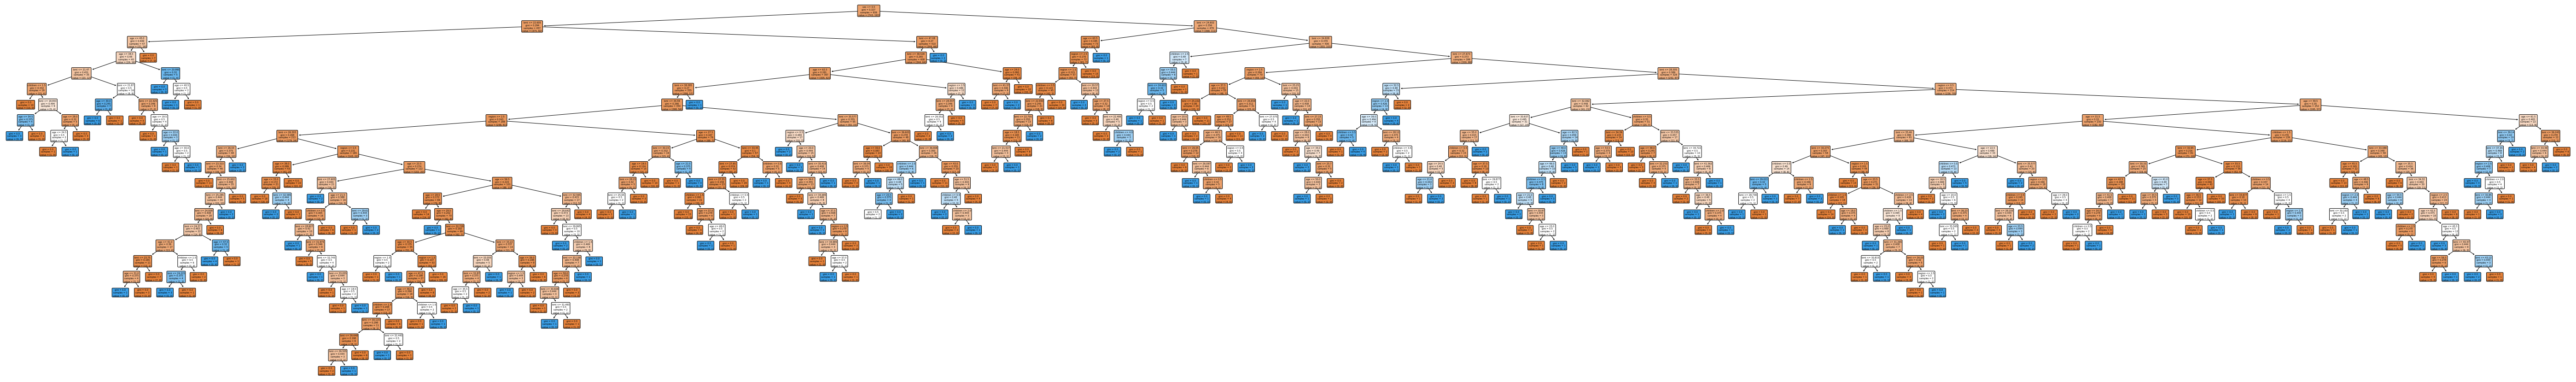

In [84]:
plt.figure(figsize=(100,15))
tree.plot_tree(d_clf,filled=True,rounded=True,feature_names=x_features)

#testing

In [85]:
testing = d_clf.predict(xtest) # ytest

In [86]:
ytest.head

<bound method NDFrame.head of 559      no
1087     no
1020     no
460      no
802      no
       ... 
323      no
1268     no
134      no
1274    yes
876      no
Name: smoker, Length: 402, dtype: object>

In [87]:
testing

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no'

#testing tree

[Text(0.33679755287418656, 0.9791666666666666, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(0.2057983663232104, 0.9375, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(0.052060737527114966, 0.8958333333333334, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(0.04772234273318872, 0.8541666666666666, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.03036876355748373, 0.8125, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.013015184381778741, 0.7708333333333334, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.008676789587852495, 0.7291666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.01735357917570499, 0.7291666666666666, 'bmi <= 18.953\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.008676789587852495, 0.6875, 'age <= 34.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.004338394793926247, 0.6458333333333334, 'gini = 0.0\nsa

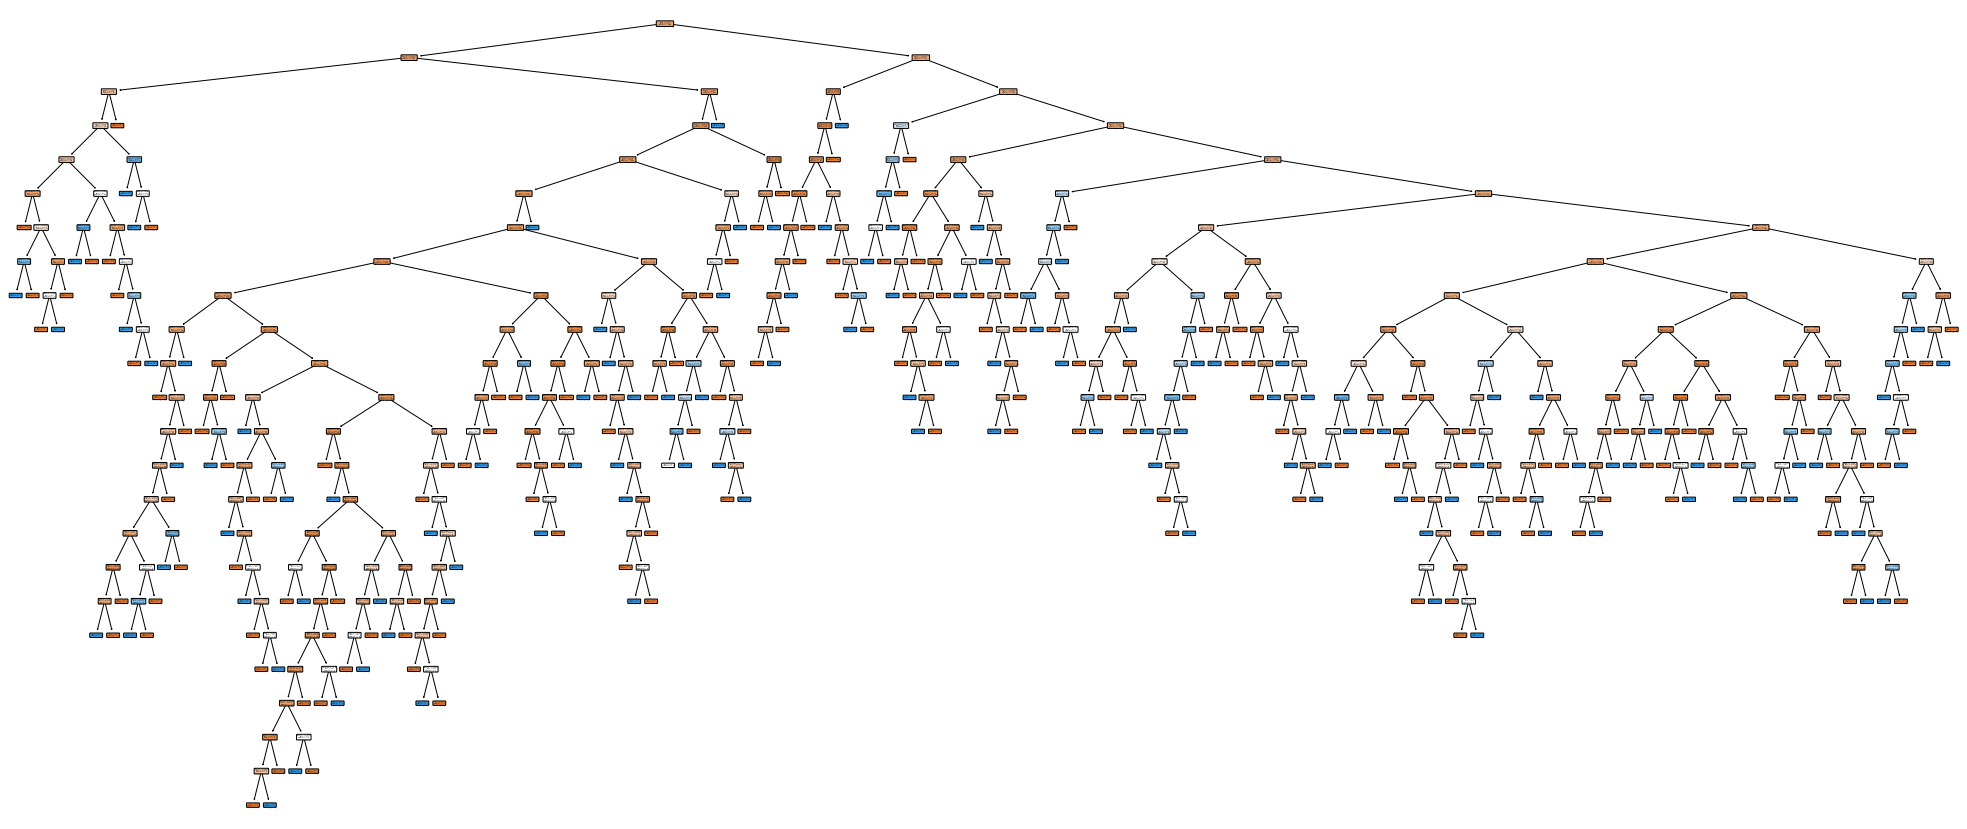

In [92]:
xtst_features = xtest.columns
plt.figure(figsize=(35,15))
tree.plot_tree(d_clf,filled=True,rounded=True,feature_names=xtst_features)

southwest,	19,	female,	27.900,	0  ------------- 	yes


southeast,	18,	male,	33.770,	1	 ------------ no

uporer ta nominal

nicher ta corresponding numeric with label encoder


3	19	0	27.900	0	------------ yes


2	18	1	33.770	1	----------- no

#predict

In [88]:
d_clf.predict([[3, 19, 0, 27.900, 0]])  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['yes'], dtype=object)

In [89]:
d_clf.predict([[2, 18, 1, 33.770, 1 ]])  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['no'], dtype=object)

#accuracy

In [90]:
d_clf.score(xtest, ytest)

0.6567164179104478

In [91]:
d_clf.score(xtrain, ytrain)

0.9989316239316239